<h1>Bioinformatics Final Project</h1>
*disclaimer* this first cell which sets up the data will take a couple hours to finish

In [1]:
# Imports for project
from io import BytesIO
import shutil
from ftplib import FTP
import requests
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import time
from IPython.display import clear_output

# Controller for project

# Global Variables
helixPop = {'Right-handed alpha':0, 'Right-handed omega':0, 'Right-handed pi':0 ,
            'Right-handed gamma':0, 'Right-handed 3 - 10':0, 'Left-handed alpha':0, 
            'Left-handed omega':0, 'Left-hended gamma':0, '2 - 7 ribbon/helix':0, 'Polyproline':0}

# get list of protein IDs to retrieve
with open('cullpdb_pc30_res3.0_R1.0_d191017_chains18877.gz') as fin: # get the list of ID's from the file
    IDs = []
    for line in fin:
        IDs += [line.split()[0].lower()]
IDs = IDs[1:] # remove file header

def getDF(idIn):
    #import gzip### set up retreival of pdb file using input code
    #ftp = FTP('ftp.wwpdb.org')
    #ftp.login('username', 'password')
    #flo = BytesIO()
    #
    pdbID = idIn[0:4]
    chain = idIn[4]
    #
    #path = '/pub/pdb/data/structures/divided/pdb/'
    #
    #ftp.cwd(path + pdbID[1:3])
    ##print('Retrieving pdb file for', pdbID)
    #ftp.retrbinary('RETR pdb' + pdbID + '.ent.gz', flo.write)
    ##print('File found')
    #flo.seek(0)
    #
    ##print('Decompressing file')
    #with open(pdbID + '.pdb', 'wb') as fout, gzip.GzipFile(fileobj = flo) as gzip:
    #    shutil.copyfileobj(gzip, fout)
    ##print('Done')
    
    seq = ""
    helix = []
    sheet = []
    atom = []
    
    # extract data for the provided chain using html request
    connected = False
    while not connected: 
        try:
            fin = requests.get('https://files.rcsb.org/view/'+ pdbID +'.pdb', stream=True)
            connected = True
        except:
            print('Problem encountered connecting to server. Retrying...')
    #print(fin.text)
    for line in fin.iter_lines():
        line = line.decode('utf-8')
        #print(line)
        if line[0:6] == 'SEQRES' and line[11].lower() == chain:
            seq += line[19:]
        if line[0:6] == 'HELIX ' and line[19].lower() == chain:
            helix.append(line.split())
        if line[0:6] == 'SHEET ' and line[21].lower() == chain:
            sheet.append(line.split())
        if line[0:6] == 'ATOM  ' and line[21].lower() == chain:
            atom.append(line.split())
    seq = seq.split()
    
    
    
    #Remove the pdb file when finished
    #print('Removing pdb file for', pdbID)
    #os.remove(pdbID+'.pdb')
    #print('Done')
    
    if seq == []:
        print('Chain', chain, 'does not exist.  Please try again with a different chain.')
        return []
    else:
        # store info in dataframes, and clean dataframes to contain only desired data
        #print('Creating DataFrames')
        if helix:
            try:
                helix = pd.DataFrame(helix)[[3,5,6,8,9,10]]
                helix.columns = ['initRes', 'initSeq', 'termRes', 'termSeq', 'type', 'length']
            except:
                helix = pd.DataFrame(helix)[[2,4,5,7,8,9]]
                helix.columns = ['initRes', 'initSeq', 'termRes', 'termSeq', 'type', 'length']
        else: helix = pd.DataFrame()
        sheet = pd.DataFrame(sheet)
        atom = pd.DataFrame(atom)[[2,3,5,6,7,8]]
        atom.columns = ['name', 'res', 'seqNum', 'x', 'y', 'z']
        #print('Done')
    return [seq, helix, sheet, atom]



def loadData1():
    proteinData = {}
    start = time.time()
    i = 0
    for ID in IDs[:int(len(IDs)/2)]:
        # do analysis here
        try:
            data = getDF(ID)
        except:
            print('Error in retrieving data')
        proteinData[ID] = data
        if i % int((len(IDs)/2)/10) == 0:
            clear_output(wait=True)
            currTime = time.time()-start
            print(round(i / int(len(IDs)/2), 2)*100, '% done')
            print('Time elapsed:',int((currTime/60)/60), 'hours', int(currTime/60)%60, 'minutes', int(currTime%60), 'seconds')
            print(i, 'Protiens analyzed')
            print()
        i += 1
    clear_output(wait=True)
    currTime = time.time()-start
    print('Total time elapsed:',int((currTime/60)/60), 'hours', int(currTime/60)%60, 'minutes', int(currTime%60), 'seconds')
    return proteinData
                  
def loadData2():
    proteinData = {}
    start = time.time()
    i = 0
    for ID in IDs[int(len(IDs)/2):]:
        # do analysis here
        try:
            data = getDF(ID)
        except:
            print('Error in retrieving data')
        proteinData[ID] = data
        if i % int(int(len(IDs)/2)/10) == 0:
            clear_output(wait=True)
            currTime = time.time()-start
            print(round(i / int(len(IDs)/2), 2)*100, '% done')
            print('Time elapsed:',int((currTime/60)/60), 'hours', int(currTime/60)%60, 'minutes', int(currTime%60), 'seconds')
            print(i, 'Protiens analyzed')
            print()
        i += 1
    clear_output(wait=True)
    currTime = time.time()-start
    print('Total time elapsed:',int((currTime/60)/60), 'hours', int(currTime/60)%60, 'minutes', int(currTime%60), 'seconds')
    return proteinData

<h1>Question 1</h1>
    Find the popularity of different kind of helices: read the data set and analyze it to find the
popularity of each type of helices

In [2]:
helixPop = {'Right-handed alpha':0, 'Right-handed omega':0, 'Right-handed pi':0 ,
            'Right-handed gamma':0, 'Right-handed 3 - 10':0, 'Left-handed alpha':0, 
            'Left-handed omega':0, 'Left-hended gamma':0, '2 - 7 ribbon/helix':0, 'Polyproline':0}

def question1(helixType):
    for helix in helixType:
        try: 
            helix = int(helix)
        except:
            helix = int(helix[0])
        if helix == 1:
            helixPop['Right-handed alpha'] += 1
        elif helix == 2:
            helixPop['Right-handed omega'] += 1
        elif helix == 3:
            helixPop['Right-handed pi'] += 1
        elif helix == 4:
            helixPop['Right-handed gamma'] += 1
        elif helix == 5:
            helixPop['Right-handed 3 - 10'] += 1
        elif helix == 6:
            helixPop['Left-handed alpha'] += 1
        elif helix == 7:
            helixPop['Left-handed omega'] += 1
        elif helix == 8:
            helixPop['Left-hended gamma'] += 1
        elif helix == 9:
            helixPop['2 - 7 ribbon/helix'] += 1
        elif helix == 10:
            helixPop['Polyproline'] += 1

<h1>Question 2</h1>
Analyze the amino acids that prefer to form/be part of helices. Does an AA prefer to
form/be part of specific type of helices?

<h1>Run questions</h1>

In [3]:
data = loadData1()

# run analysis for first half of data

for protein in data:
    try:
        question1(data[protein][1]['type'])
    except:
        clear_output(wait=True)
        print('given protein has no helix')

%reset_selective -f data
        
data = loadData2()

# run analysis for second half of data

for protein in data:
    try:
        question1(data[protein][1]['type'])
    except:
        clear_output(wait=True)
        print('given protein has no helix')

given protein has no helix


<h1>Question 1 Output</h1>

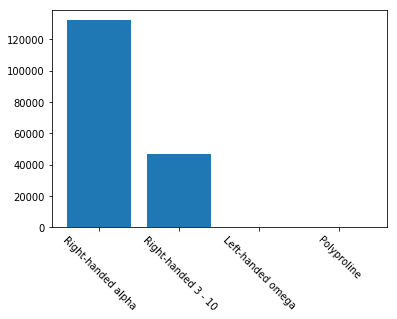

In [23]:
q1Data = {}
for entry in helixPop:
    if helixPop[entry] > 0:
        q1Data[entry] = helixPop[entry]

plt.bar(q1Data.keys(), q1Data.values())
plt.xticks(rotation=-45)
plt.show()